My workbook for learning to create beautiful plots using seaborn and matplotlib. Will keep updating as I learn more.

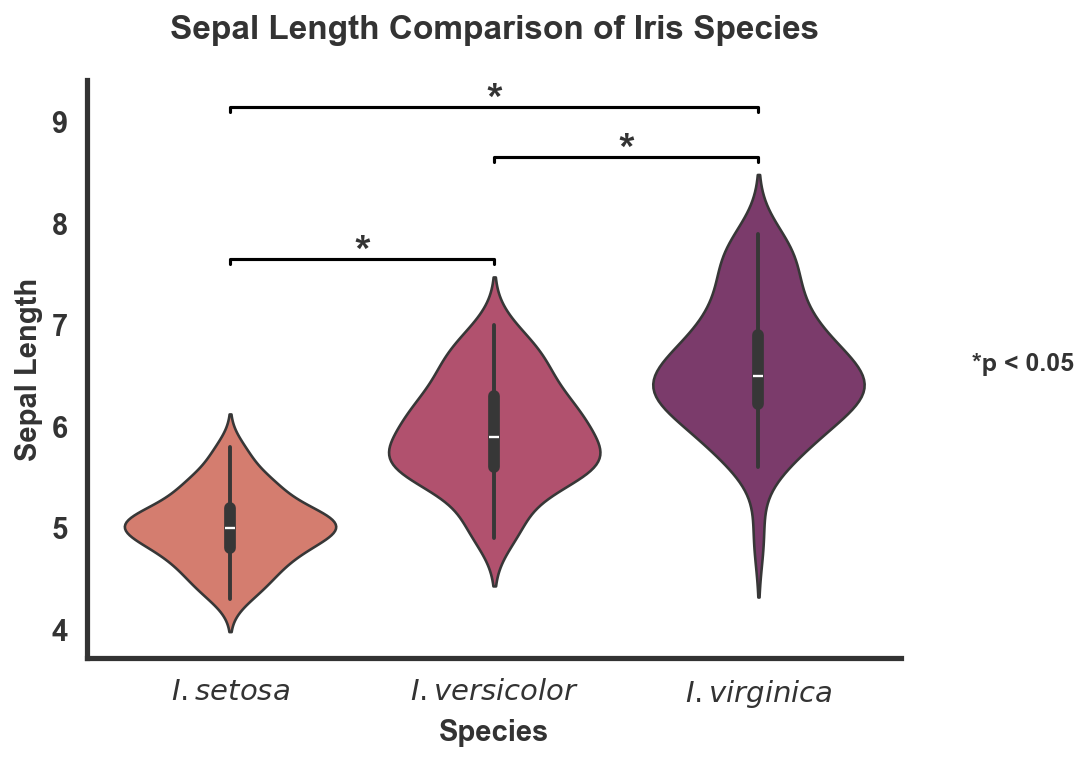

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

iris = sns.load_dataset("iris")

sns.set_theme(style="white", rc={"figure.dpi": 150} )

plt.figure(figsize=(7, 5))
ax = sns.violinplot(x="species", y="sepal_length", data=iris, palette="flare", hue="species")

#plot appearance 🤧
for axis in ["bottom", "left"]:
    ax.spines[axis].set_linewidth(2.5)
    ax.spines[axis].set_color("0.2")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.tick_params(width=2.5, color="0.2")

# x-tick positions and labels
ax.set_xticks([0, 1, 2])
ax.set_xticklabels([r"$I.\ setosa$", r"$I.\ versicolor$", r"$I.\ virginica$"], fontsize=14, weight="bold", color="0.2")


#for tick labels
plt.xticks(size=14, weight="bold", color="0.2")
plt.yticks(size=14, weight="bold", color="0.2")

# for axis labels
ax.set_xlabel("Species", fontsize=14, weight="bold", color="0.2")
ax.set_ylabel("Sepal Length", fontsize=14, weight="bold", color="0.2")

new_labels = ["I. setosa", "I. versicolor", "I. virginica"]
ax.set_xticklabels([r"$I. setosa$", r"$I. versicolor$", r"$I. virginica$"], fontsize=14, weight="bold", color="0.2")
# ax.set_ylim(1,9)

# adding significance markers based on t-tests
species_pairs = [("setosa", "versicolor"), ("versicolor", "virginica"), ("setosa", "virginica")]

#to help map species to their x-axis positions
species_positions = {"setosa": 0, "versicolor": 1, "virginica": 2}

#offset to prevent overlap of comparison lines
line_offsets = [0.6, 0.7, 1.2] 

for i, (species1, species2) in enumerate(species_pairs):
    s1 = iris[iris["species"] == species1]["sepal_length"]
    s2 = iris[iris["species"] == species2]["sepal_length"]
    
    # t-test between species
    p = stats.ttest_ind(s1, s2).pvalue
    
    # this is to find maximum value in the current pair of species for positioning the significance marker
    max_value = iris[iris["species"].isin([species1, species2])]["sepal_length"].max()

    # adding line connecting the groups being compared at different positions to avoid overlapping
    x1, x2 = species_positions[species1], species_positions[species2]
    y = max_value + line_offsets[i]  # Adjust height of the line using line_offsets
    plt.plot([x1, x1, x2, x2], [y, y + 0.05, y + 0.05, y], lw=1.5, color="black")

    # placing significance marker (*) for p < 0.05, "ns" for not significant
    if p < 0.05:
        plt.text((x1 + x2) * 0.5, y-0.08 , s="*", fontsize=20, ha="center", va="bottom", color="0.2", weight="bold")
    else:
        plt.text((x1 + x2) * 0.5, y-0.08, s="ns", fontsize=12, ha="center", va="bottom", color="0.2")


plt.title("Sepal Length Comparison of Iris Species", fontsize=16, weight="bold", color="0.2", pad=20)

# legend for the significance markers
plt.text(3, 6.5, "*p < 0.05", fontsize=12, ha="center", va="bottom", color="0.2", weight="bold")


# plt.savefig("iris_sepals.png", bbox_inches="tight", dpi=250)
plt.show()


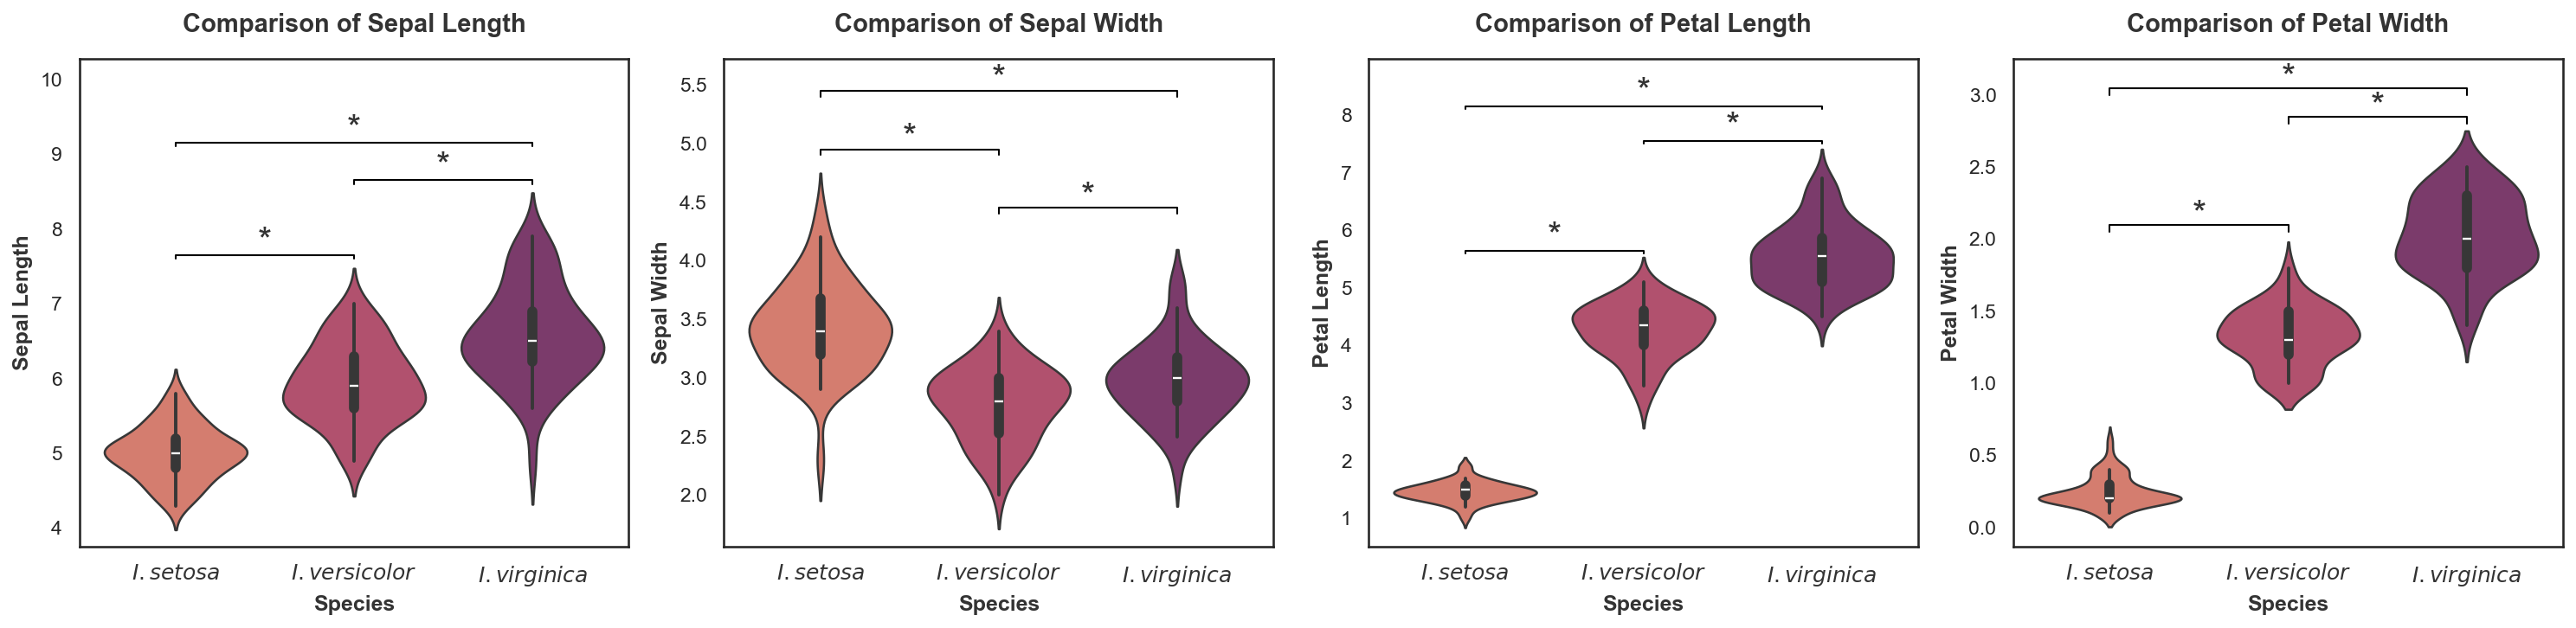

In [68]:
#grid for the four plots
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# parameters to plot
parameters = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
titles = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"]

# plotting and comparing each parameter by species
for i, ax in enumerate(axes.flatten()):
    sns.violinplot(x="species", y=parameters[i], data=iris, palette="flare", hue="species", ax=ax)
    
    #plot appearance, borders, ticks, labels
    ax.tick_params(width=2.5, color="0.2")

    #x-tick labels (italicize species names)
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels([r"$I. setosa$", r"$I. versicolor$", r"$I. virginica$"], fontsize=12, weight="bold", color="0.2")
    
    #setting custom y-axis to incorporate statistics better
    ylimit= ax.get_ylim()
    max_value=iris[parameters[i]].max()
    ax.set_ylim(ylimit[0],max_value*1.3)

    ax.set_xlabel("Species", fontsize=12, weight="bold", color="0.2")
    ax.set_ylabel(titles[i], fontsize=12, weight="bold", color="0.2")
    ax.set_title(f"Comparison of {titles[i]}", fontsize=14, weight="bold", color="0.2", pad=15)

    plt.subplots_adjust(bottom=0.8, right=0.9, top=0.9)

    
    species_pairs = [("setosa", "versicolor"), ("versicolor", "virginica"), ("setosa", "virginica")]
    species_positions = {"setosa": 0, "versicolor": 1, "virginica": 2}  #linking species to x-axis positions

    # custom offsets to avoid overlapping lines because each graph has differnt scaling according to its y axis
    line_offsets2={0:[0.6,0.7,1.2],1:[0.5,0.6,1],2:[0.5,0.6,1.2],3:[0.25,0.3,0.5]}
    for xn, (species1, species2) in enumerate(species_pairs):
        
        s1 = iris[iris["species"] == species1][parameters[i]]
        s2 = iris[iris["species"] == species2][parameters[i]]
        
        p = stats.ttest_ind(s1, s2).pvalue
        
        # finding  the max value for positioning the significance markers
        max_value = iris[iris["species"].isin([species1, species2])][parameters[i]].max()

        # line to indicate comparison between the two species on the current subplot
        x1, x2 = species_positions[species1], species_positions[species2]
        y = max_value + line_offsets2[i][xn]
        ax.plot([x1,x1, x2, x2], [y, y + 0.05, y + 0.05, y], lw=1, color="black")

        # significance marker: "*" for p < 0.05, "ns" otherwise
        if p < 0.05:
            ax.text((x1 + x2) * 0.5, y, s="*", fontsize=20, ha="center", va="bottom", color="0.2") #add weight="bold" to mke bold
        else:
            ax.text((x1 + x2) * 0.5, y, s="ns", fontsize=12, ha="center", va="bottom", color="0.2")


plt.tight_layout()



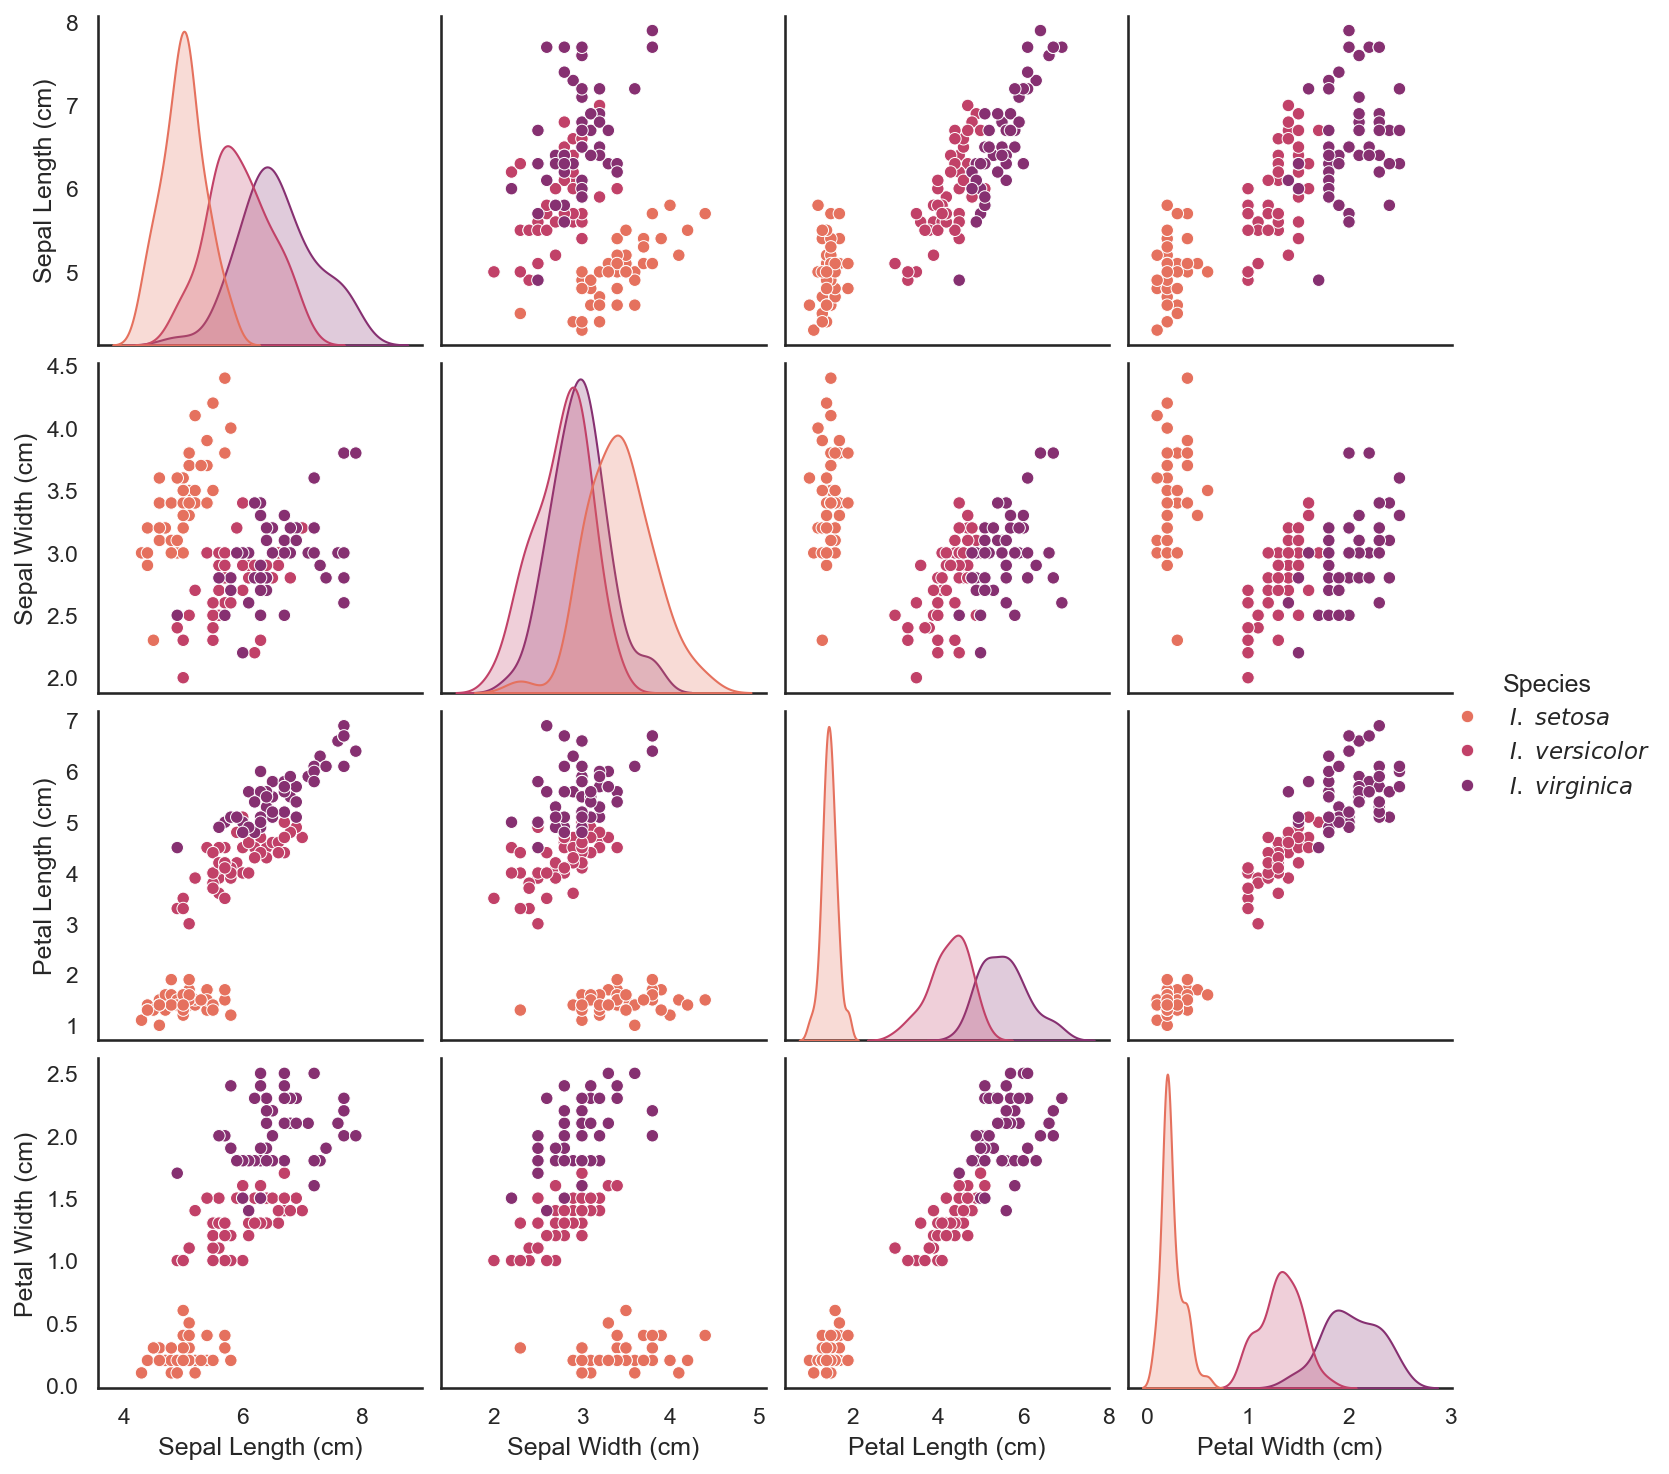

In [70]:
# simple plots for data comparison
iris_pair= sns.pairplot(data=iris, hue="species", palette="flare")

# to change the labels
axis_labels= {"sepal_length": "Sepal Length (cm)","sepal_width": "Sepal Width (cm)","petal_length": "Petal Length (cm)","petal_width": "Petal Width (cm)"}
legend_labels= [r"$I.\ setosa$", r"$I.\ versicolor$", r"$I.\ virginica$"]

for plot in iris_pair.axes.flatten():
    xlabel= plot.get_xlabel()
    ylabel= plot.get_ylabel()

    if xlabel in axis_labels:
        plot.set_xlabel(axis_labels[xlabel])
    if ylabel in axis_labels:
        plot.set_ylabel(axis_labels[ylabel])

for t,l in zip(iris_pair._legend.texts, legend_labels):
    t.set_text(l)

iris_pair._legend.set_title("Species")

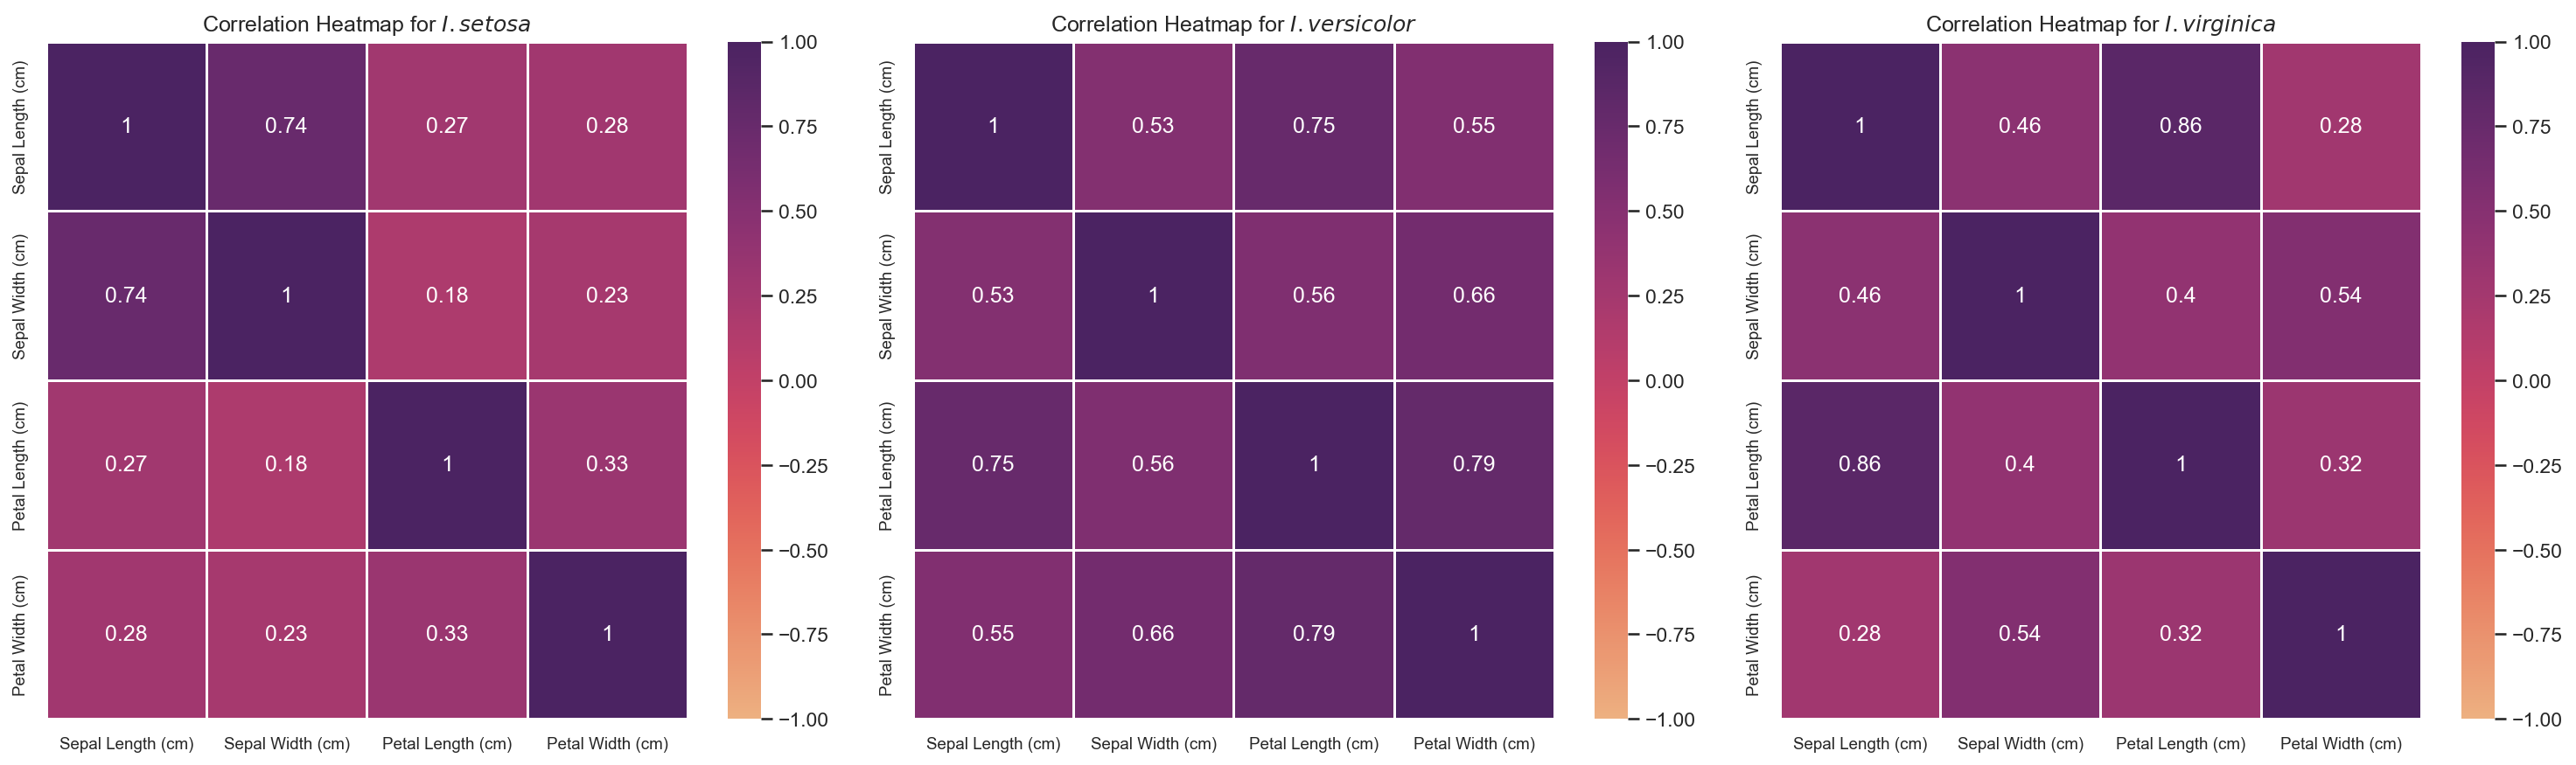

In [61]:
import matplotlib.pyplot as plt

species =iris["species"].unique()

axis_labels= {"sepal_length": "Sepal Length (cm)","sepal_width": "Sepal Width (cm)","petal_length": "Petal Length (cm)","petal_width": "Petal Width (cm)"}

fig, axes = plt.subplots(1,len(species), figsize=(20,6))

for axis, specie in zip(axes,species):
    data= iris[iris["species"] == specie].drop(columns="species")
    corr_matrix = data.corr()
    sns.heatmap(corr_matrix, annot=True, cmap="flare", ax=axis, vmin=-1, vmax=1, linewidths=0.5)
    axis.set_title(f"Correlation Heatmap for $I. {specie}$")
    
    axis.set_xticklabels([axis_labels.get(label, label) for label in corr_matrix.columns], rotation=0, fontsize=9)
    axis.set_yticklabels([axis_labels.get(label, label) for label in corr_matrix.columns], fontsize=9)

iris_pair._legend.set_title("Species")

plt.tight_layout()
plt.show()


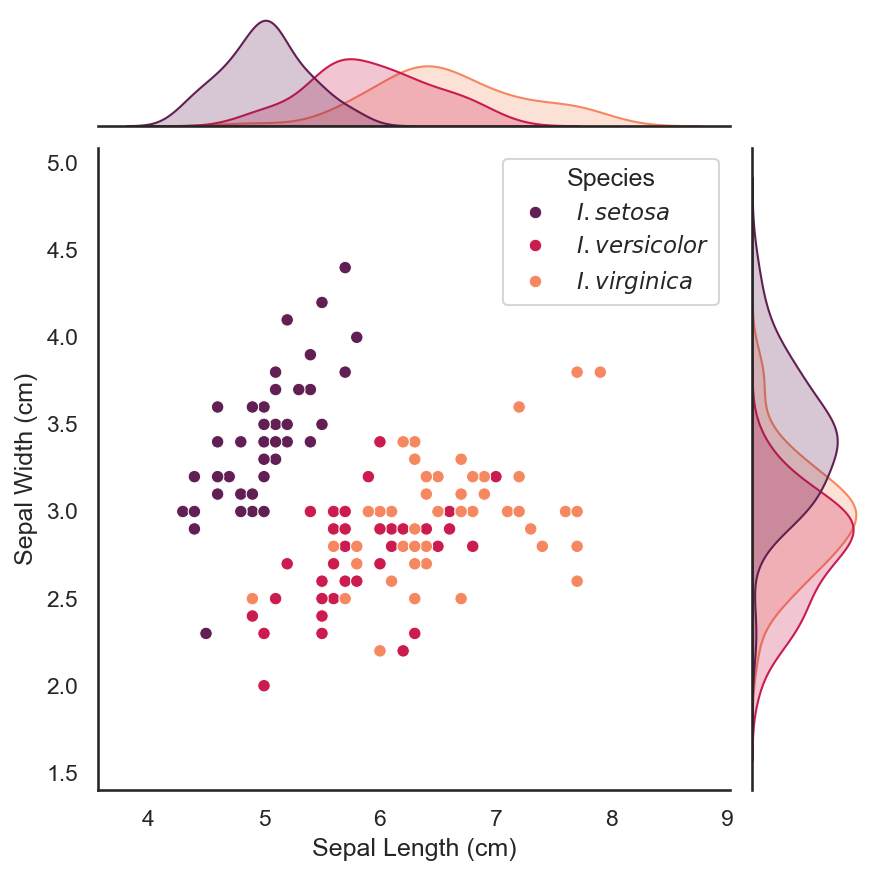

In [71]:
iris_sepal_joint= sns.jointplot(x="sepal_length", y="sepal_width", data=iris, kind="scatter", hue="species", palette="rocket")

iris_sepal_joint.ax_joint.set_xlabel("Sepal Length (cm)")
iris_sepal_joint.ax_joint.set_ylabel("Sepal Width (cm)")

iris_sepal_joint_legend = iris_sepal_joint.ax_joint.legend()
iris_sepal_joint_legend.set_title("Species")

legend_labels = [r"$I. setosa$", r"$I. versicolor$", r"$I. virginica$"]
for text, new_label in zip(iris_sepal_joint_legend.texts, legend_labels):
    text.set_text(new_label)

[Text(0.5, 0, 'Sepal Length (cm)'),
 Text(1.5, 0, 'Sepal Width (cm)'),
 Text(2.5, 0, 'Petal Length (cm)'),
 Text(3.5, 0, 'Petal Width (cm)')]

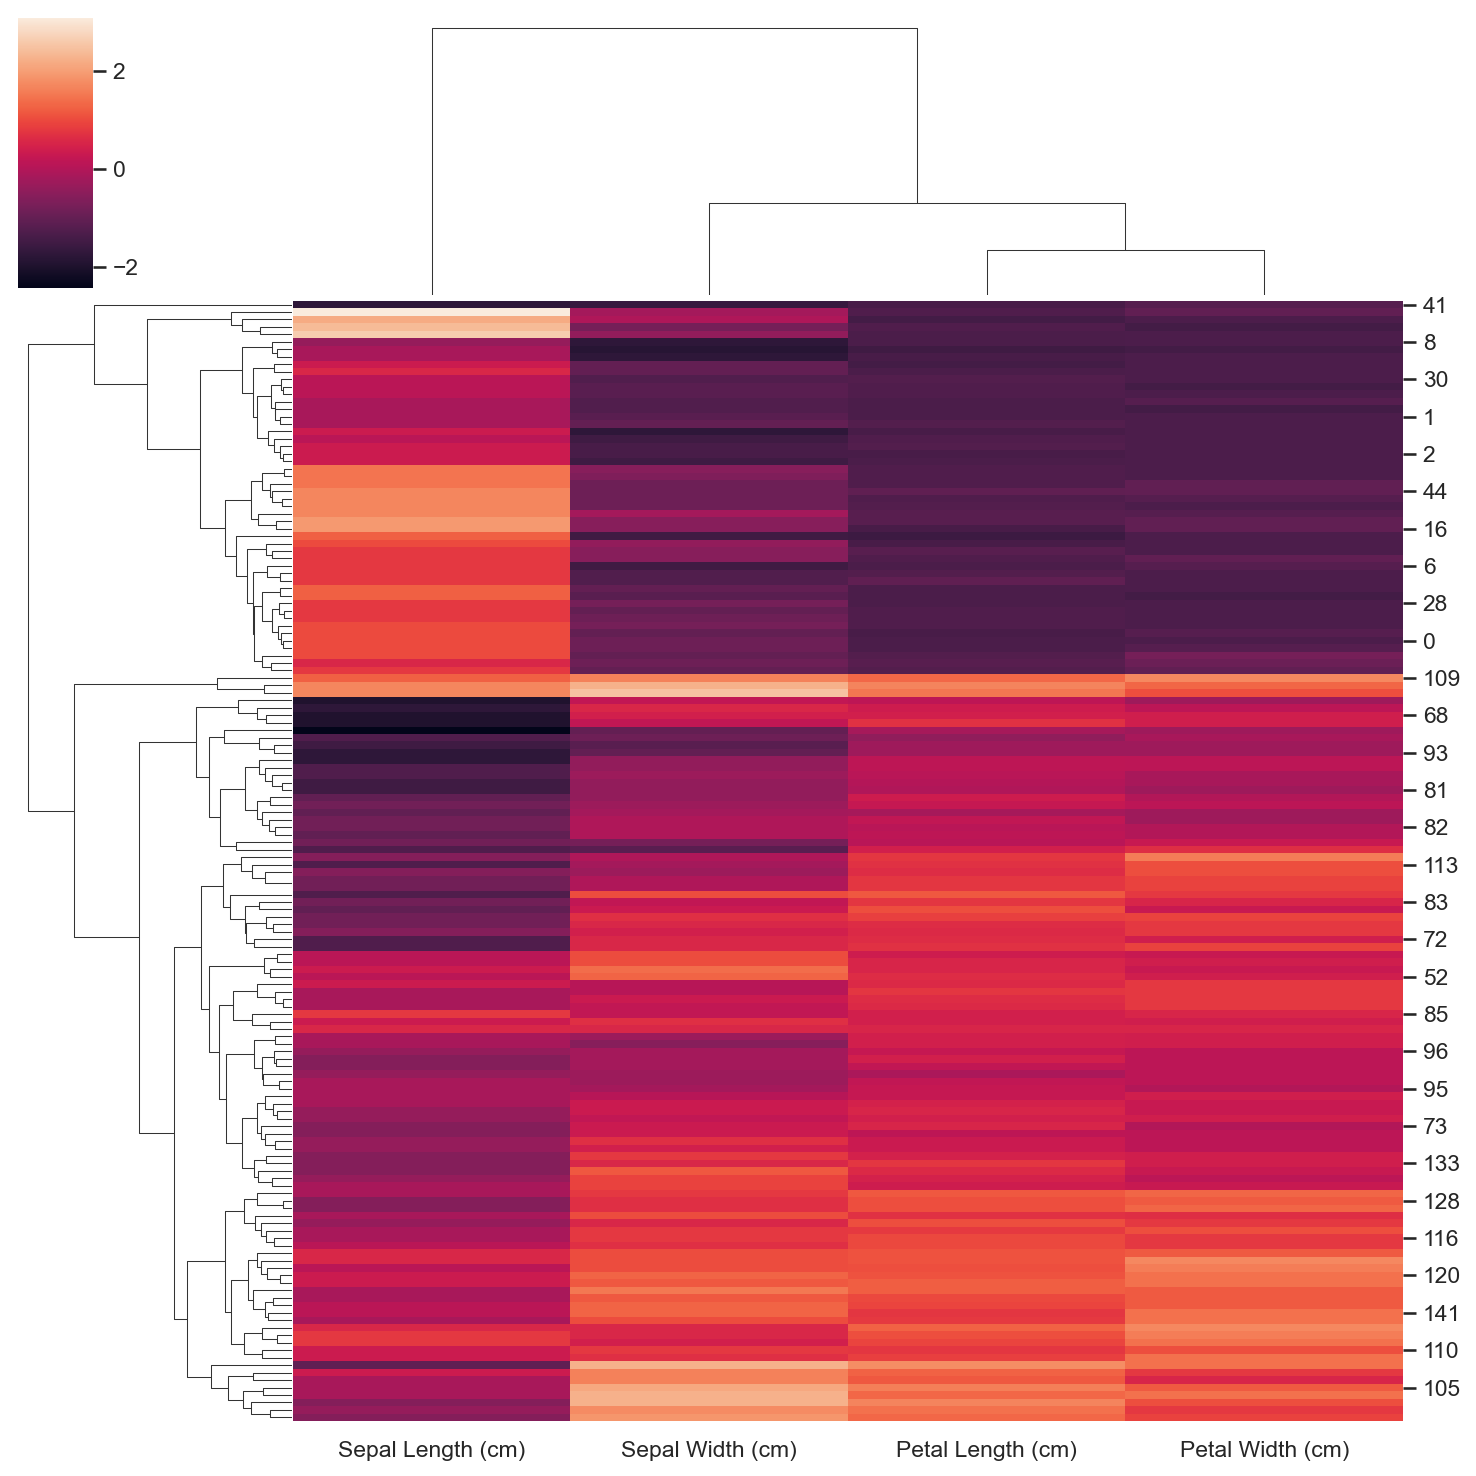

In [81]:
iris_=sns.load_dataset("iris")
species_= iris_.pop("species")
iris_cluster=sns.clustermap(iris_, z_score=1)

xaxis_labels= ["Sepal Length (cm)", "Sepal Width (cm)","Petal Length (cm)","Petal Width (cm)"]
iris_cluster.ax_heatmap.set_xticklabels(xaxis_labels, rotation=0)